In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

import numpy as np

In [4]:
cluster_2016 = pd.read_csv('cluster_data_less.csv',index_col = False)

In [5]:
cluster_2016.head()

,Unnamed: 0,VEHICLE_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,0,108647,Überseering/Mexikoring,213687.0,Bebelallee/Meenkwiese,213855.0,Hamburg,Android,28.800000,1
1,1,108371,Stadthausbrücke / Neuer Wall,138379.0,Goldbekplatz / Semperstraße,140796.0,Hamburg,iPhone,27.050000,1
2,2,119829,Jungfernstieg / Ballindamm,131879.0,Hauptbahnhof Ost / Hachmannplatz,131873.0,Hamburg,iPhone,11.216667,1
3,3,116810,Hudtwalckerstraße / Bebelallee,138378.0,Kellinghusenstraße / Loogeplatz,140795.0,Hamburg,others,75.383333,1
4,4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,131883.0,Feldstraße / Marktstraße,244093.0,Hamburg,Android,8.983333,1


In [6]:
# dropping  the index column
cluster_2016 = cluster_2016.drop(columns=['Unnamed: 0'])

In [7]:
cluster_2016.tail(5)

,VEHICLE_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
1999995,163843,Studentenwohnheim Ginnheimer Landstr. 42,226257.0,Fritzlarerstraße / Kirchplatz,214447.0,Frankfurt am Main,Android,13.083333,6
1999996,143763,Axel-Springer-Platz/Wexstraße,163327.0,Axel-Springer-Platz/Wexstraße,163327.0,Hamburg,others,1.733333,6
1999997,106407,Darmstadt Hbf,42198.0,h_da / Campus - Mensa,41940.0,Berlin,others,246.366667,6
1999998,113595,Darmstadt Hbf,128496.0,h_da / Campus - Mensa,243552.0,Darmstadt,Android,11.016667,6
1999999,143840,Dehnhaide/Barmbeker Markt,17335.0,Weidestraße /Johannes-Prassek-Park,54063.0,Berlin,iPhone,22.816667,6


In [8]:
cluster_2016['VEHICLE_HAL_ID'].unique()

array([108647, 108371, 119829, ..., 110310, 107219, 108927])

In [9]:
len(cluster_2016['VEHICLE_HAL_ID'].unique())

10001

In [10]:
cluster_2016['TECHNICAL_INCOME_CHANNEL'].unique()

array(['Android', 'iPhone', 'others', 'IVR', 'Windows', 'BlackBerry'],
      dtype=object)

In [11]:
cluster_2016['Month'].unique()

array([1, 2, 3, 4, 5, 6])

In [12]:
#! pip install kmodes
# ! pip install --upgrade pip

# Implementation

In [13]:
# converting all categorcal variable to dummy encoding

cluster_2016['CITY_RENTAL_ZONE']=cluster_2016['CITY_RENTAL_ZONE'].astype('category').cat.codes
cluster_2016['TECHNICAL_INCOME_CHANNEL']=cluster_2016['TECHNICAL_INCOME_CHANNEL'].astype('category').cat.codes
cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE', 'END_RENTAL_ZONE'])

In [14]:
cluster_2016.tail(5)

,VEHICLE_HAL_ID,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
1999995,163843,226257.0,214447.0,12,0,13.083333,6
1999996,143763,163327.0,163327.0,18,5,1.733333,6
1999997,106407,42198.0,41940.0,3,5,246.366667,6
1999998,113595,128496.0,243552.0,8,0,11.016667,6
1999999,143840,17335.0,54063.0,3,4,22.816667,6


In [15]:
# To convert the value into numpy array

cluster_2016 = cluster_2016.iloc[:, 0:].values

In [16]:
# printing the first array of features

cluster_2016[0]

array([1.08647e+05, 2.13687e+05, 2.13855e+05, 1.80000e+01, 0.00000e+00,
       2.88000e+01, 1.00000e+00])

In [22]:
# with 'Cao' initilization as it is a optimized initializer and verbose is information to see.
# no of cluster is 7 according elbow method with lower cost

kmeans = KMeans(n_clusters=7, random_state=0,verbose=3).fit(cluster_2016)


clusters = kmeans.fit_predict(cluster_2016)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1902176184182708.2
start iteration
done sorting
end inner loop
Iteration 1, inertia 1835396765731198.0
start iteration
done sorting
end inner loop
Iteration 2, inertia 1831074589233287.8
start iteration
done sorting
end inner loop
Iteration 3, inertia 1830940540033546.8
start iteration
done sorting
end inner loop
Iteration 4, inertia 1830940170113959.8
center shift 1.456119e+01 within tolerance 1.708899e+05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1910436958288290.5
start iteration
done sorting
end inner loop
Iteration 1, inertia 1832026936927554.2
start iteration
done sorting
end inner loop
Iteration 2, inertia 1830957454197527.8
start iteration
done sorting
end inner loop
Iteration 3, inertia 1830940212482033.0
center shift 1.517289e+02 within tolerance 1.708899e+05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, ine

Iteration 1, inertia 2733643001526078.5
start iteration
done sorting
end inner loop
Iteration 2, inertia 2706145978835400.5
start iteration
done sorting
end inner loop
Iteration 3, inertia 2677582311354657.5
start iteration
done sorting
end inner loop
Iteration 4, inertia 2659925713325869.0
start iteration
done sorting
end inner loop
Iteration 5, inertia 2655540643220222.5
start iteration
done sorting
end inner loop
Iteration 6, inertia 2654690208787516.0
start iteration
done sorting
end inner loop
Iteration 7, inertia 2654517642567148.0
start iteration
done sorting
end inner loop
Iteration 8, inertia 2654505242851000.0
center shift 2.038669e+02 within tolerance 1.708899e+05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1845590040590222.2
start iteration
done sorting
end inner loop
Iteration 1, inertia 1831609640244617.5
start iteration
done sorting
end inner loop
Iteration 2, inertia 1830944720228068.2
start iteration
done sorting
end inner l

In [25]:
# predict all the labels

kmeans.predict(cluster_2016)

array([0, 1, 1, ..., 2, 5, 2], dtype=int32)

In [27]:
labels = kmeans.predict(cluster_2016)

In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d import Axes3D

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(cluster_2016)

In [29]:
%matplotlib inline

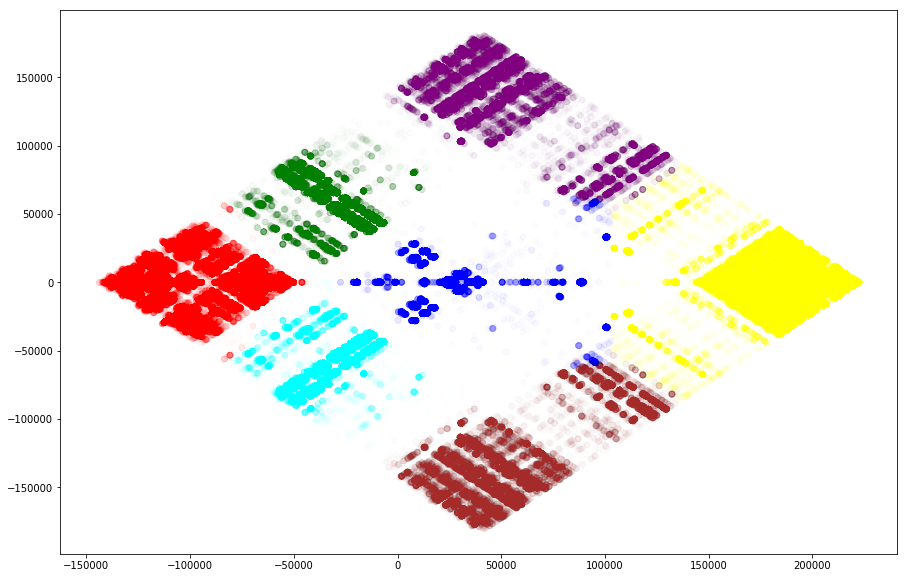

In [31]:
# plotting the all the clusters in 2D by using PCA

colors = ['red','blue','yellow','green','purple','cyan','brown']
fig = plt.figure(figsize = (15,10))
plt.scatter(x = plot_columns[:,0],y = plot_columns[:,1],c=[colors[l_] for l_ in labels] ,label = labels, alpha=0.01)
plt.show()

In [32]:
plt.savefig('kmean.png')

<Figure size 432x288 with 0 Axes>

In [33]:
labels = [colors[l_] for l_ in labels]

In [34]:
# cluster distribution for the dataset

lab = pd.DataFrame(labels)
for col in colors:
    print(col, str(lab[lab[0]==col].count()))

red 0    656642
dtype: int64
blue 0    377111
dtype: int64
yellow 0    331732
dtype: int64
green 0    239664
dtype: int64
purple 0    77039
dtype: int64
cyan 0    241275
dtype: int64
brown 0    76537
dtype: int64


In [43]:
import pandas as pd
 
# The kmeans algorithm is implemented in the scikits-learn library
from sklearn.cluster import KMeans

cl_no = []
costs = []

Trying on each cluster to see the cost
for k in range (1, 15):
    
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(cluster_2016)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
 
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
    cl_no.append(k)
    costs.append(interia)
print(cl_no)
print(costs)

k: 1  cost: 2.392458958013829e+16
k: 2  cost: 1.125654401770643e+16
k: 3  cost: 7147362434446539.0
k: 4  cost: 4510711244939717.0
k: 5  cost: 3219966606914771.0
k: 6  cost: 2521008385107822.0
k: 7  cost: 1830940169974450.5
k: 8  cost: 1514844602513144.5
k: 9  cost: 1317977160316090.0
k: 10  cost: 1132501601471609.0
k: 11  cost: 1043383395539220.6
k: 12  cost: 963185190675732.1
k: 13  cost: 893371629022722.1
k: 14  cost: 852265169649573.5
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[2.392458958013829e+16, 1.125654401770643e+16, 7147362434446539.0, 4510711244939717.0, 3219966606914771.0, 2521008385107822.0, 1830940169974450.5, 1514844602513144.5, 1317977160316090.0, 1132501601471609.0, 1043383395539220.6, 963185190675732.1, 893371629022722.1, 852265169649573.5]


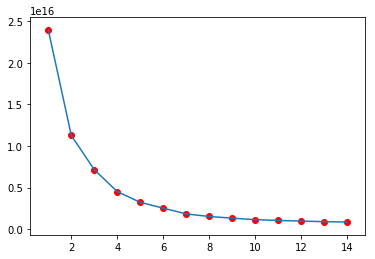

In [44]:
# plot cost vs cluster number

cl_no = np.array(cl_no)
costs = np.array(costs)
plt.plot(cl_no,costs)
plt.scatter(cl_no,costs,c='red')
plt.show()